In [1]:
# Setting up the notebook
import sys
import os
import matplotlib.pyplot as plt

# Import local libraries
sys.path.append('../exercises_complements')
from shared_functions import check_task_with_solution
from darcy_law_experiment import darcy_experiment_simulation
from darcy_law_experiment import mcp_behaviour_curve
from print_images import display_image

# Exercise 3 : Darcy experiment


## Context 

You are given a Darcy experiement set-up :


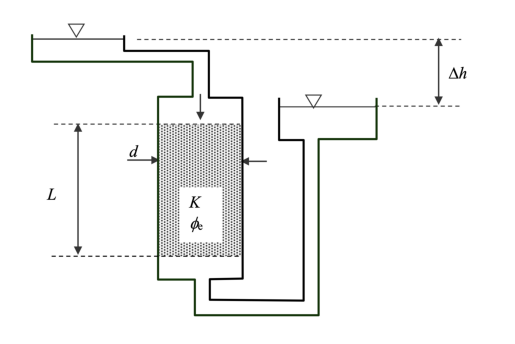

In [2]:
display_image("DarcyExperimentSetup.png")

The following data parameters are known :
- Hydraulic conductivity $K$ = 0.0003 $\text{m}/\text{s}^{-1}$
- Column diameter $d$ = 2.54 cm
- Effective porosity $\phi_e$ = 0.25
- Column length $L$ = 1 m

You are able to measure the head differenve $\Delta h$ between at the input and at the output of the water column. 

The specific discharge $q$ stays unknown to you.



## Darcy's law theory

In [2]:
check_task_with_solution("task03_1")
check_task_with_solution("task03_3")


## Task 1:
Let's first check the theory.  You observe that $\Delta h=0.4$ m.
- What is your estimate of the specific discharge $q$ in mm/s?


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()


## Task 2:
Based on given data, estimate the mean velocity of water $u$ in the soil column in mm/s:


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()

## Darcy's experiment simulation

Let's now see how we can derive experimentally the linear relationship between:
- the hydraulic gradient $I$ = $\frac{\Delta h}{L}$
- the specific discharge $q$.

In our Darcy's experiment, water flows through the soil column. 

We can vary the hydraulic head difference $\Delta h$ and now the possibility to measure $q$ as well. 

We measure the specific discharge for several hydraulic gradients and plot $q$ against $I$.





In [ ]:
mcp_behaviour_curve()


## Task 5:
Based on the experiment's graph, what is your estimate for the hydraulic conductivity $K$ in mm/s?


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()